In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris["feature_names"])

In [5]:
df["target"]=iris.target

In [7]:
df["target_name"]=df["target"].apply(lambda x: iris["target_names"][x])

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
df[45:60]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [12]:
x=df.drop(["target","target_name"],axis=1)
y=df.target

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9333333333333333

In [22]:
knn.predict(x_test)

array([2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1,
       2, 2, 0, 0, 1, 1, 1, 1])

In [30]:
pr=knn.predict_proba(x_test)

In [31]:
pr

array([[0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.

In [39]:
from sklearn.metrics import classification_report
y_predict=knn.predict(x_test)
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.93      0.93      0.93        14
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.95      0.95      0.95        30
weighted avg       0.93      0.93      0.93        30



In [41]:
from sklearn.metrics import confusion_matrix
ce=confusion_matrix(y_test,y_predict)
ce

array([[ 5,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 10]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

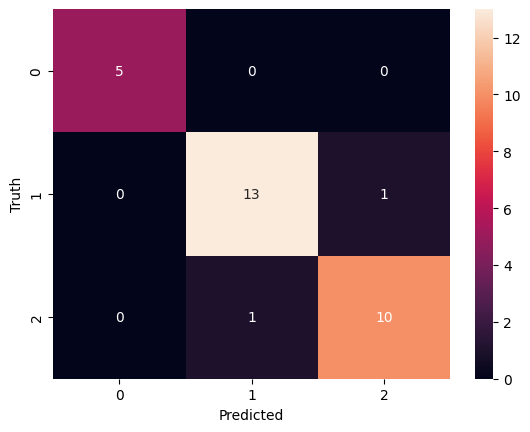

In [43]:
import seaborn as sns
sns.heatmap(ce,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [44]:
df0=df[df["target"]==0]
df1=df[df["target"]==1]
df2=df[df["target"]==2]


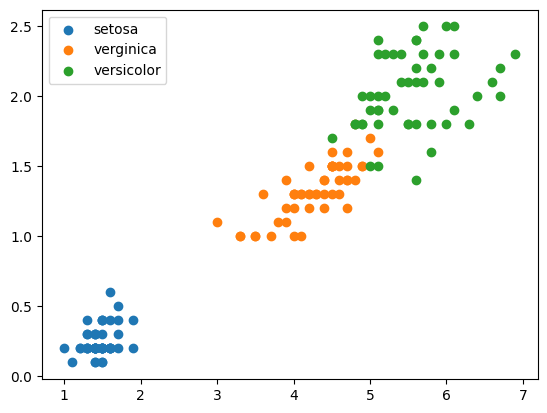

In [49]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],label="setosa")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],label="verginica")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],label="versicolor")
plt.legend()